In [21]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import pickle
import os


In [22]:
#calculates the probability of detection given the parameter value (mu) and uncertainty (sigma)
#assumes PDF is gaussian normally distributed
def detect_prob(mu, sigma, doprint=0): 

    Pd = 1-0.5*(1+erf((-1*mu)/(sigma*np.sqrt(2))))  #detection probability, modified from CDF function

    Pd_pcnt_str=str(np.around(Pd*100,decimals=1))+'% positive probability' #string output version

    if doprint > 0:
        print(Pd_pcnt_str)

    return Pd, Pd_pcnt_str

In [41]:
def read_data(filetag):

    #make directories and set figure output names
    figurepath='figures/'+filetag
    try: 
        os.mkdir(figurepath)
        print(figurepath)
    except OSError as error: 
        print(error)  

    fig_outname=figurepath+'/'+filetag+'_gyre'

    # read pickle files as dataframes
    outname='data/'+filetag
    df_name=outname+'_df.pkl'
    fdfe_name=outname+'_fdfe.pkl'
    vars_name=outname+'_vars.pkl'

    f = open(vars_name, 'rb')
    waveln,meas,rel_err,sys_err,jac_all = pickle.load(f)
    f.close()

    df = pd.read_pickle(df_name)
    fdfe_in = pd.read_pickle(fdfe_name)
    fdfe_in

    # remove dataframe elements as selected

    fdfe=fdfe_in
    fdfe.drop(fdfe.loc[fdfe['Windspeed(m_s)']!=5.0].index, inplace=True)
    fdfe.drop(fdfe.loc[fdfe['chla(mg_m3)']!=0.5].index, inplace=True)
    fdfe.drop(fdfe.loc[fdfe['AOD(869)']!=0.15].index, inplace=True)
    fdfe.drop(fdfe.loc[fdfe['solz']<30.0].index, inplace=True)
    fdfe.drop(fdfe.loc[fdfe['senz']>30.0].index, inplace=True)
    fdfe.drop(fdfe.loc[fdfe['FMF']>0.5].index, inplace=True)

    return fdfe, fig_outname



In [42]:
#set file tags:

tag_longdescription="Simulation for nadir viewing, 13 channel sensor [412, 443, 469, 488, 531, 547, 555, 645, 667, 678, 748, 859, 869] nm"

tag=['Multispectral, Biofouled: ',
     'Multispectral, Biofouled, doubled measurement uncertainty: ',
     'Multispectral, Biofouled, no model uncertainty: ',
     'Multispectral, non-Biofouled: ']

filetag=['SQOOP_Amir_BF', #Biofouled, with both model and measurement uncertainty
         'SQOOP_Amir_BF_x2unc', #Biofouled, with both model and doubled measurement uncertainty'
         'SQOOP_Amir_BF_nomodunc', #Biofouled, with measurement uncertainty only (no modeling uncertainty)
         'SQOOP_Amir_NB'] #non-Biofouled, with both model and measurement uncertainty


fdfe_BF, fig_outname_BF = read_data(filetag[0])
fdfe_BF_x2unc, fig_outname_BF_x2unc = read_data(filetag[1])
fdfe_BF_nomodunc, fig_outname_BF_nomodunc = read_data(filetag[2])
fdfe_NB, fig_outname_NB = read_data(filetag[3])

colors = ['darkcyan','darkorange','darkgray','chocolate','seagreen','cyan','green',
         'yellow','red','grey','purple'] 


[Errno 17] File exists: 'figures/SQOOP_Amir_BF'
[Errno 17] File exists: 'figures/SQOOP_Amir_BF_x2unc'
[Errno 17] File exists: 'figures/SQOOP_Amir_BF_nomodunc'
[Errno 17] File exists: 'figures/SQOOP_Amir_NB'


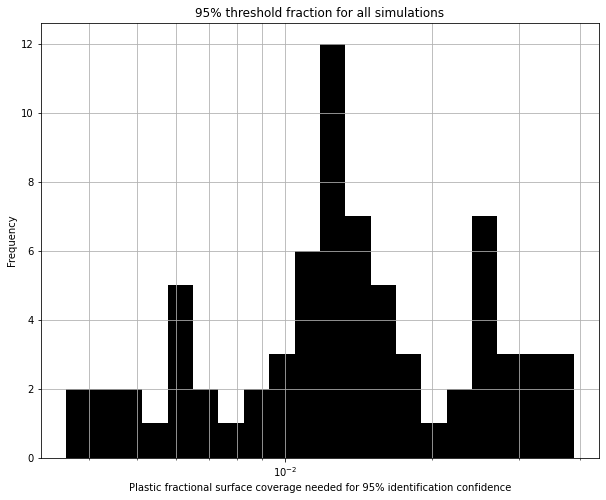

In [43]:
bn=20

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl='95% threshold fraction for all simulations'
plt.title(titl)

this=fdfe_BF['plastic_threshold']
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,label='Biofouled',color='black')

this=fdfe_BF_x2unc['plastic_threshold']
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#plt.hist(this, bins=logbins,label='Biofouled, 2x measurement uncertainty',
#         alpha=0.25,color='lightcoral',edgecolor='black')

this=fdfe_BF_nomodunc['plastic_threshold']
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#plt.hist(this, bins=logbins,label='Biofouled, no model uncertainty',
#         alpha=0.25,color='aquamarine',edgecolor='black')

this=fdfe_NB['plastic_threshold']
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#plt.hist(this, bins=logbins,label='Non-biofouled',
#         alpha=0.25,color='palegreen',edgecolor='black')

plt.xlabel('Plastic fractional surface coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')

fig_filename = 'SQOOP_histogram_gyre_all.pdf'
plt.savefig(fig_filename)
plt.show()

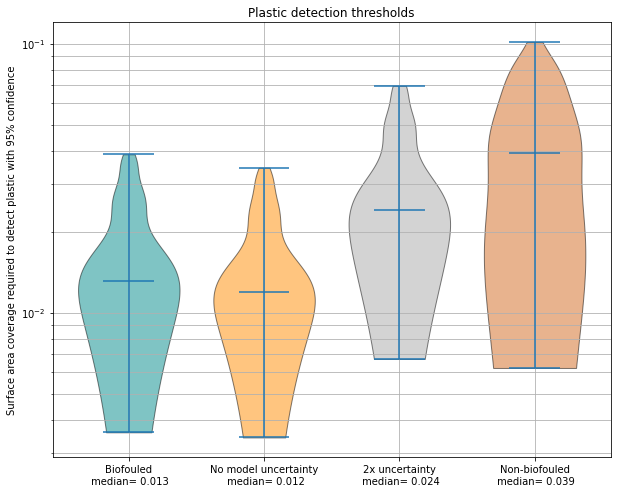

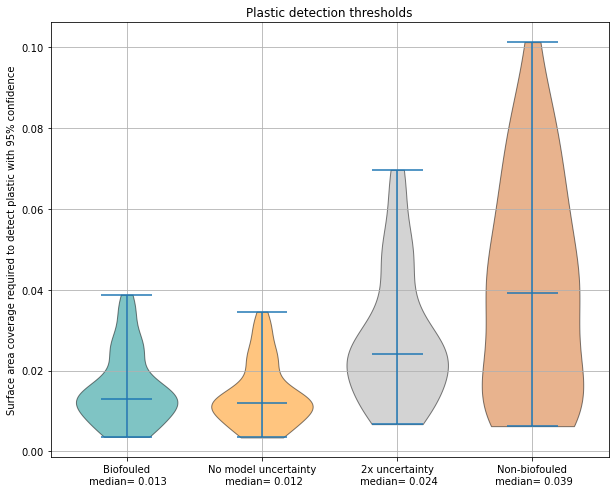

In [77]:
bn=50

dat=[ fdfe_BF['plastic_threshold'],
    fdfe_BF_nomodunc['plastic_threshold'],
    fdfe_BF_x2unc['plastic_threshold'],
    fdfe_NB['plastic_threshold'] ] 

####plot in log space

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('Plastic detection thresholds')
plt.ylabel('Surface area coverage required to detect plastic with 95% confidence')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)
plt.yscale('log')

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[index])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

labels = ["Biofouled", "No model uncertainty", "2x uncertainty", "Non-biofouled"]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"6.3f"))
plt.xticks(range(1, 5), labels, rotation=0)

fig_filename = 'figures/SQOOP_histogram_gyre_all_log.pdf'
plt.savefig(fig_filename)
plt.show()


####plot in linear space

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('Plastic detection thresholds')
plt.ylabel('Surface area coverage required to detect plastic with 95% confidence')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[index])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

    
labels = ["Biofouled", "No model uncertainty", "2x uncertainty", "Non-biofouled"]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"6.3f"))
plt.xticks(range(1, 5), labels, rotation=0)

fig_filename = 'figures/SQOOP_histogram_gyre_all.pdf'
plt.savefig(fig_filename)
plt.show()





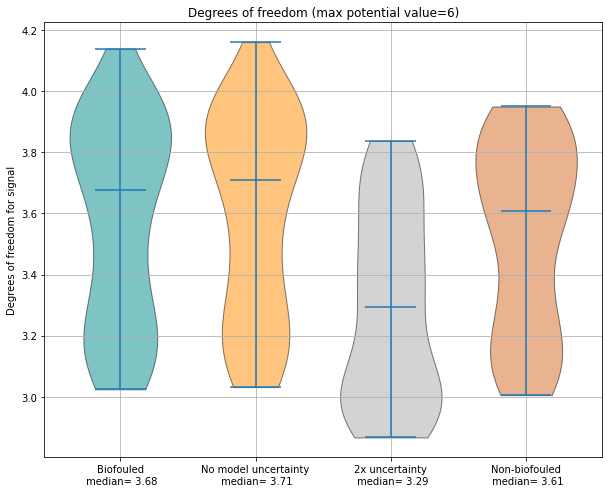

In [74]:
bn=50

dat=[ fdfe_BF['DFS_median'],
    fdfe_BF_nomodunc['DFS_median'],
    fdfe_BF_x2unc['DFS_median'],
    fdfe_NB['DFS_median'] ] 


####plot in linear space

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('Degrees of freedom (max potential value=6)')
plt.ylabel('Degrees of freedom for signal')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[index])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

labels = ["Biofouled", "No model uncertainty", "2x uncertainty", "Non-biofouled"]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"5.2f"))
           
plt.xticks(range(1, 5), labels, rotation=0)

fig_filename = 'figures/SQOOP_histogram_gyre_dfs.pdf'
plt.savefig(fig_filename)
plt.show()





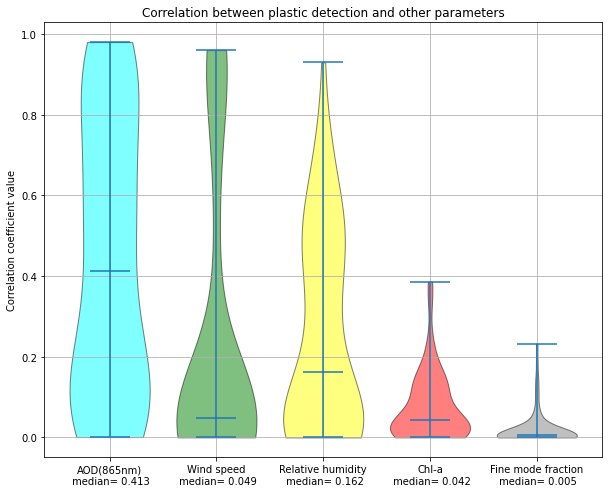

In [80]:
dat=[ fdfe_BF['Cor_5_3_median'],
    fdfe_BF['Cor_5_0_median'],
    fdfe_BF['Cor_5_1_median'],
    fdfe_BF['Cor_5_4_median'],
    fdfe_BF['Cor_5_2_median'] ] 

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('Correlation between plastic detection and other parameters')
plt.ylabel('Correlation coefficient value')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[index+5])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

labels = ['AOD(865nm)', 'Wind speed', 'Relative humidity', "Chl-a", "Fine mode fraction"]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"6.3f"))
plt.xticks(range(1, 6), labels, rotation=0)

fig_filename = 'figures/SQOOP_histogram_gyre_correlation.pdf'
plt.savefig(fig_filename)
plt.show()
